# DGA Detection, Character-based RNN

This notebook is broken down into the following tasks:

* Clean and pre-process the data.
* Standardization and normalization of numerical variables
* Define features for harmonic sequencing
* Create train/test `.csv` files that hold the relevant features and class labels for train/test data points


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

In [2]:
# should be the name of directory you created to save your features data
data_dir = 'data'

In [3]:
# take a look at some matsnu example domains
from dga import matsnu

for i in range(10):
    print(matsnu.generate_domain())

halfliveaddresswiseoption.com
dietcourserentanticipate.com
ironrushfixbooktwistquarter.com
clockliplivestormspaceought.com
amountoughtoccasionhearbe.com
ratedraftaccordinglecture.com
hallboxheatdisappointedskin.com
freedomricetransitionmiss.com
hopereactcaseluckmanscript.com
culturemessmeetprogresspace.com


In [4]:
# matsnu domains
matsnu_list = []

for i in range(20000):
    matsnu_list.append(matsnu.generate_domain())
    
matsnu_df = pd.DataFrame(matsnu_list, columns=['domain'])

print("Matsnu Shape:", matsnu_df.shape)

matsnu_df['label'] = 'dga'

matsnu_df.head()

Matsnu Shape: (20000, 1)


,domain,label
0,organizationborrowairaccount.com,dga
1,factfirmpagebootswingblack.com,dga
2,yearcarpetlinkpersuadesail.com,dga
3,steptrusttiredconcernedinsist.com,dga
4,substancedealresortapply.com,dga


In [5]:
# save in data file
matsnu_df.to_csv(data_dir + "/matsnu.csv")

In [6]:
# alex top 1 million domains
alexa_df = pd.read_csv(data_dir + "/alexa_top_1m.csv", names=['domain'])

alexa_df['label'] = 'benign'

alexa_df.head()

,domain,label
1,google.com,benign
2,youtube.com,benign
3,facebook.com,benign
4,baidu.com,benign
5,wikipedia.org,benign


In [7]:
train_df = pd.concat([alexa_df.iloc[:20000], matsnu_df.iloc[:20000]], axis=0).reset_index(drop=True)

In [8]:
train_df.head()

,domain,label
0,google.com,benign
1,youtube.com,benign
2,facebook.com,benign
3,baidu.com,benign
4,wikipedia.org,benign


In [9]:
!pip install sklearn

  Using cached https://files.pythonhosted.org/packages/1e/7a/dbb3be0ce9bd5c8b7e3d87328e79063f8b263b2b1bfa4774cb1147bfcd3f/sklearn-0.0.tar.gz
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=4a06432fb60ca6f779b87685825c71046f3f889449d5e77102407fe459b797df
  Stored in directory: C:\Users\gilleal\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [10]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

In [11]:
# apply le on categorical feature columns
train_df['label'] = le.fit_transform(train_df['label'])

train_df['label'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: label, dtype: int32

In [12]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

# print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + string.digits + " .'"
n_letters = len(all_letters)

In [13]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('b'))

print(lineToTensor('blindpagegolucksinkorganize.com').size())

print(len('blindpagegolucksinkorganize.com'))

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
torch.Size([31, 1, 65])
31


In [14]:
import random

def randomTrainingExample():
    category = random.randint(0, 1)
    line = train_df[train_df['label'] == category].sample()['domain'].values[0]
    category_tensor = torch.tensor([category], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = 1 / line = concertclaimsiteevennose.com
category = 1 / line = patterndiestagecomparechallenge.com
category = 1 / line = hallwarmstaffrewardunderstand.com
category = 1 / line = dietdoctorbecomelostloose.com
category = 1 / line = girlfriendovercomecommunicate.com
category = 0 / line = educacion.gob.ar
category = 1 / line = associatediscountattachcomment.com
category = 1 / line = fishingtruckprintcomplicated.com
category = 0 / line = broced.co
category = 1 / line = interviewpromptmeetlistbottle.com


In [15]:
import torch.nn as nn

n_categories = 2

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128

rnn = RNN(n_letters, n_hidden, n_categories)

In [16]:
criterion = nn.NLLLoss()

In [86]:
learning_rate = 0.003 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        
        output, hidden = rnn(line_tensor[i], hidden)
    
    loss = criterion(output, category_tensor)
    loss.backward()
    
    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

In [87]:
input = lineToTensor('tonerelaxbootremainthink.com')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)

print(output)

tensor([[-0.6710, -0.7158]], grad_fn=<LogSoftmaxBackward>)


In [88]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return le.classes_[category_i], category_i

print(categoryFromOutput(output))

('benign', 0)


In [89]:
import time
import math

n_iters = 10000
print_every = 500
plot_every = 100

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss
    
    guess, guess_i = categoryFromOutput(output)
    
    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess_i == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

500 5% (0m 5s) 0.5175 footthrowdreamofferground.com / dga ✓
1000 10% (0m 12s) 0.5252 rbc.ua / benign ✓
1500 15% (0m 18s) 0.3919 trueid.net / benign ✓
2000 20% (0m 24s) 0.4615 datepracticeteamattemptfeed.com / dga ✓
2500 25% (0m 30s) 0.4552 pressurehabitretainstable.com / dga ✓
3000 30% (0m 37s) 0.4235 menulettergardencurvefactor.com / dga ✓
3500 35% (0m 44s) 0.4247 hallbeingclaimsnowcomment.com / dga ✓
4000 40% (0m 50s) 0.4064 titlesetleggroundcompete.com / dga ✓
4500 45% (0m 57s) 0.0915 salamdl.info / benign ✓
5000 50% (1m 3s) 0.8661 newegg.com / dga ✗ (0)
5500 55% (1m 9s) 0.3892 housedetailstyleignorecomfort.com / dga ✓
6000 60% (1m 16s) 1.0979 eurowings.com / dga ✗ (0)
6500 65% (1m 22s) 0.5010 enthusiasmhirepageeatremaining.com / dga ✓
7000 70% (1m 28s) 0.7551 yearinterestedliftprefer.com / benign ✗ (1)
7500 75% (1m 34s) 0.4064 moodliftgrowbeamazingavoid.com / dga ✓
8000 80% (1m 40s) 1.1735 omegle.com / dga ✗ (0)
8500 85% (1m 47s) 0.8016 okdiario.com / dga ✗ (0)
9000 90% (1m 53s) 1.

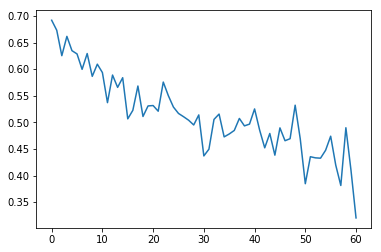

In [79]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [90]:
def entropy(string):
    """
    Calculates the Shannon entropy of a string
    """

    # Get probability of chars in string
    prob = [ float(string.count(c)) / len(string) for c in dict.fromkeys(list(string)) ]

    # Calculate the entropy
    entropy = - sum([ p * math.log(p) / math.log(2.0) for p in prob ])

    return entropy

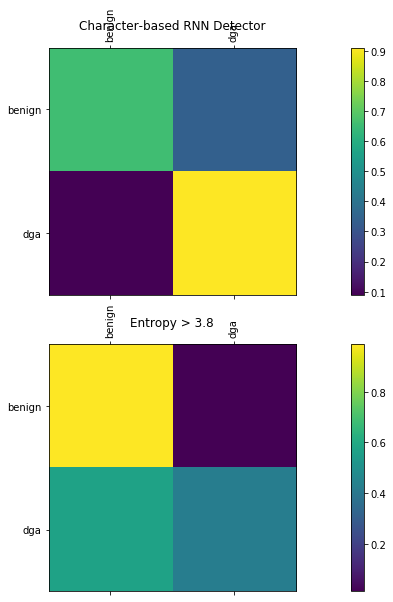

In [91]:
import numpy as np

# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
confusion_e = torch.zeros(n_categories, n_categories)

n_confusion = 1000

y_pred_rnn = np.array([])

y_pred_e = np.array([])

y = np.array([])

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = category
    
    if entropy(line) > 3.8:
        guess_i_e = 1
    else:
        guess_i_e = 0
    
    confusion[category_i][guess_i] += 1
    confusion_e[category_i][guess_i_e] += 1
    
    y_pred_rnn = np.append(y_pred_rnn, guess_i)
    y_pred_e = np.append(y_pred_e, guess_i_e)
    y = np.append(y, category_i)

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()
    confusion_e[i] = confusion_e[i] / confusion_e[i].sum()

# Set up plot
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
cax = ax1.matshow(confusion.numpy())
fig.colorbar(cax)

ax1.set_xticklabels([''] + le.classes_.tolist(), rotation=90)
ax1.set_yticklabels([''] + le.classes_.tolist())

# Force label at every tick
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))

ax2 = fig.add_subplot(212)
cax = ax2.matshow(confusion_e.numpy())
fig.colorbar(cax)

# Set up axes
ax2.set_xticklabels([''] + le.classes_.tolist(), rotation=90)
ax2.set_yticklabels([''] + le.classes_.tolist())

# Force label at every tick
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(1))

ax1.title.set_text('Character-based RNN Detector')
ax2.title.set_text('Entropy > 3.8')


plt.show()

In [92]:
import torch.nn.functional as F

results = []
truths = []

for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    probs = F.softmax(output, dim=1).cpu().detach().numpy()

    results.append(probs)
    truths.append(category)

P, y = np.vstack(results), np.hstack(truths)

In [93]:
from sklearn.metrics import roc_curve, auc

num_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve([1 if label == i else 0 for label in y], P[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

y_test = np.array([[1 if label == i else 0 for label in y] for i in range(num_classes)]).ravel()
y_preds = P.T.ravel()
fpr['micro'], tpr['micro'], _ = roc_curve(y_test, y_preds)
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

In [94]:
from scipy import interp

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= num_classes

fpr['macro'], tpr['macro'] = all_fpr, mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

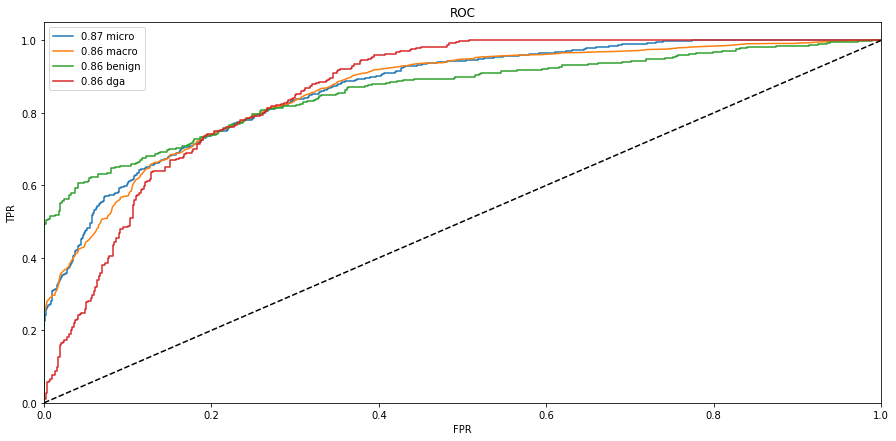

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(fpr['micro'], tpr['micro'], label=f'{roc_auc["micro"]:.2f} micro')
ax.plot(fpr['macro'], tpr['macro'], label=f'{roc_auc["macro"]:.2f} macro')

for k in fpr.keys():
    if k in ['micro', 'macro']:
        continue
    f = fpr[k]
    t = tpr[k]
    l = le.classes_.tolist()[k]
    r = roc_auc[k]

    ax.plot(f, t, label=f'{r:.2f} {l}')

ax.plot([0, 1], [0, 1], 'k--')
ax.set_title('ROC')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_xlim([0, 1.0])
ax.set_ylim([0.0, 1.05])
        
ax.legend()

In [ ]:
# Save model
torch.save(model.state_dict(), PATH)